## Time Series

This section shows some tools to work with datetime and time series. 

![](../img/datetime.png)

### datefinder: Automatically Find Dates and Time in a Python String

In [ ]:
!pip install datefinder

If you want to automatically find date and time with different formats in a Python string, try datefinder. 

In [17]:
from datefinder import find_dates

text = """"We have one meeting on May 17th, 2021 at 9:00am 
and another meeting on 5/18/2021 at 10:00. 
I hope you can attend one of the meetings."""

matches = find_dates(text)

for match in matches:
    print("Date and time:", match)
    print("Only day:", match.day)

Date and time: 2021-05-17 09:00:00
Only day: 17
Date and time: 2021-05-18 10:00:00
Only day: 18


[Link to datefinder](https://github.com/akoumjian/datefinder).



### Fastai's add_datepart: Add Relevant DateTime Features in One Line of Code

In [ ]:
!pip install fastai

When working with time series, other features such as year, month, week, day of the week, day of the year, whether it is the end of the year or not, can be really helpful to predict future events. Is there a way that you can get all of those features in one line of code?

Fastai’s add_datepart method allows you to do exactly that. 

In [41]:
import pandas as pd
from fastai.tabular.core import add_datepart
from datetime import datetime

df = pd.DataFrame(
    {
        "date": [
            datetime(2020, 2, 5),
            datetime(2020, 2, 6),
            datetime(2020, 2, 7),
            datetime(2020, 2, 8),
        ],
        "val": [1, 2, 3, 4],
    }
)

df

,date,val
0,2020-02-05,1
1,2020-02-06,2
2,2020-02-07,3
3,2020-02-08,4


<IPython.core.display.Javascript object>

In [42]:
df = add_datepart(df, "date")
df.columns

Index(['val', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Elapsed'],
      dtype='object')

<IPython.core.display.Javascript object>

[Link to Fastai's methods to work with tabular data](https://docs.fast.ai/tabular.core.html)

### Maya: Convert the string to datetime automatically

In [ ]:
!pip install maya

If you want to convert a string type to a datetime type, the common way is to use `strptime(date_string, format)`. But it is quite inconvenient to specify the structure of your datetime string, such as ‘ %Y-%m-%d %H:%M:%S’.

There is a tool that helps you convert the string to datetime automatically called maya. You just need to parse the string and maya will figure out the structure of your string.

In [49]:
import maya

# Automatically parse datetime string
string = "2016-12-16 18:23:45.423992+00:00"
maya.parse(string).datetime()

datetime.datetime(2016, 12, 16, 18, 23, 45, 423992, tzinfo=<UTC>)

<IPython.core.display.Javascript object>

Better yet, if you want to convert the string to a different time zone (for example, CST), you can parse that into maya’s datetime function.

In [50]:
maya.parse(string).datetime(to_timezone="US/Central")

datetime.datetime(2016, 12, 16, 12, 23, 45, 423992, tzinfo=<DstTzInfo 'US/Central' CST-1 day, 18:00:00 STD>)

<IPython.core.display.Javascript object>

[Link to maya](https://github.com/timofurrer/maya).

### Pendulum: Python Datetimes Made Easy

In [ ]:
!pip install pendulum

While native datetime instances are sufficient for simple cases, they can become difficult to work with when dealing with more complex scenarios. 

Pendulum, on the other hand, offers a more intuitive and user-friendly API, making it a convenient drop-in replacement for the standard datetime class.

The examples below demonstrate the syntax differences between using the standard datetime library and Pendulum.

Datetime:

In [17]:
from datetime import datetime, timedelta
import pytz

# Get current time in Paris
paris_time = datetime.now(pytz.timezone("Europe/Paris"))

# Convert Paris time to Toronto time
toronto_timezone = pytz.timezone("America/Toronto")
toronto_time = paris_time.astimezone(toronto_timezone)

# Add two days
future_datetime = toronto_time + timedelta(days=2)

print("Toronto Time:", toronto_time)
print("Paris Time:", paris_time)
print("Future datetime (after adding two days):", future_datetime)

Toronto Time: 2024-03-26 10:19:01.843320-04:00
Paris Time: 2024-03-26 15:19:01.843320+01:00
Future datetime (after adding two days): 2024-03-28 10:19:01.843320-04:00


Pendulum:

In [18]:
import pendulum

# Get current time in Paris
paris_time = pendulum.now("Europe/Paris")

# Convert Paris time to Toronto time
toronto_time = paris_time.in_timezone("America/Toronto")

# Add two days
future_datetime = toronto_time.add(days=2)

print("Toronto Time:", toronto_time)
print("Paris Time:", paris_time)
print("Future datetime (after adding two days):", future_datetime)

Toronto Time: 2024-03-26 10:19:03.398059-04:00
Paris Time: 2024-03-26 15:19:03.398059+01:00
Future datetime (after adding two days): 2024-03-28 10:19:03.398059-04:00


[Link to Pendulum](https://bit.ly/49aJ4gS).

### traces: A Python Library for Unevenly-Spaced Time Series Analysis


In [ ]:
!pip install traces

If you are working with unevenly-spaced time series, try traces. traces allows you to get the values of the datetimes not specified in your time series based on the values of other datetimes.  

For example, while logging our working hours for each date, we forgot to log the working hours for some dates.

In [21]:
# Log working hours for each date
import traces 
from datetime import datetime 

working_hours = traces.TimeSeries()
working_hours[datetime(2021, 9, 10)] = 10
working_hours[datetime(2021, 9, 12)] = 5
working_hours[datetime(2021, 9, 13)] = 6
working_hours[datetime(2021, 9, 16)] = 2

We can get the working hours of dates we forgot to log using traces.

In [22]:
# Get value on 2021/09/11
working_hours[datetime(2021, 9, 11)]

10

In [23]:
# Get value on 2021/09/14
working_hours[datetime(2021, 9, 14)]

6

We can also get the distribution of our working hours from `2021-9-10` to `2021-9-16` using `distribution`:

In [24]:
distribution = working_hours.distribution(
    start=datetime(2021, 9, 10),
    end=datetime(2021, 9, 16)
)
distribution

Histogram({5: 0.16666666666666666, 6: 0.5, 10: 0.3333333333333333})

From the output above, it seems like we work 6 hours per day 50% of the time.

Get the median working hours:

In [25]:
distribution.median()

6.0

Get the mean working hours:

In [26]:
distribution.mean()

7.166666666666666

[Link to traces](https://github.com/datascopeanalytics/traces)

### Extract holiday from date column

In [ ]:
!pip install holidays

You have a date column and you think the holidays might affect the target of your data. Is there an easy way to extract the holidays from the date? That is when holidays package comes in handy.

Holidays package provides a dictionary of holidays for different countries. The code below is to confirm whether 2020-07-04 is a US holiday and extract the name of the holiday.

In [52]:
from datetime import date
import holidays

us_holidays = holidays.UnitedStates()

"2014-07-04" in us_holidays

True

<IPython.core.display.Javascript object>

The great thing about this package is that you can write the date in whatever way you want and the package is still able to detect which date you are talking about.

In [53]:
us_holidays.get("2014-7-4")

'Independence Day'

<IPython.core.display.Javascript object>

In [54]:
us_holidays.get("2014/7/4")

'Independence Day'

<IPython.core.display.Javascript object>

[Link to holidays](https://pypi.org/project/holidays/).

### Workalendar: Handle Working-Day Computation in Python  

In [ ]:
!pip install workalendar

If you want to handle calendars, holidays, and working-day-related computations, use Workalendar. Workalendar supports nearly 100 countries over the world. 

In [9]:
from datetime import date 
from workalendar.usa import UnitedStates
from workalendar.asia import Japan

In [10]:
# Get all holidays in the US

US_cal = UnitedStates()
US_cal.holidays(2022)

[(datetime.date(2021, 12, 31), 'New year (Observed)'),
 (datetime.date(2022, 1, 1), 'New year'),
 (datetime.date(2022, 1, 17), 'Birthday of Martin Luther King, Jr.'),
 (datetime.date(2022, 2, 21), "Washington's Birthday"),
 (datetime.date(2022, 5, 30), 'Memorial Day'),
 (datetime.date(2022, 7, 4), 'Independence Day'),
 (datetime.date(2022, 9, 5), 'Labor Day'),
 (datetime.date(2022, 10, 10), 'Columbus Day'),
 (datetime.date(2022, 11, 11), 'Veterans Day'),
 (datetime.date(2022, 11, 24), 'Thanksgiving Day'),
 (datetime.date(2022, 12, 25), 'Christmas Day'),
 (datetime.date(2022, 12, 26), 'Christmas Day (Observed)')]

In [11]:
US_cal.is_working_day(date(2022, 1, 22)) # Saturday

False

In [12]:
US_cal.is_working_day(date(2021, 12, 24)) # Thanksgiving Day

False

In [14]:
# Calculate working days between 2022/1/19 and 2022/5/15
US_cal.get_working_days_delta(date(2022, 1, 19), date(2022, 5, 15))

81

In [13]:
# Get holidays in Japan
JA_cal = Japan()
JA_cal.holidays(2022)

[(datetime.date(2022, 1, 1), 'New year'),
 (datetime.date(2022, 1, 10), 'Coming of Age Day'),
 (datetime.date(2022, 2, 11), 'Foundation Day'),
 (datetime.date(2022, 2, 23), "The Emperor's Birthday"),
 (datetime.date(2022, 3, 21), 'Vernal Equinox Day'),
 (datetime.date(2022, 4, 29), 'Showa Day'),
 (datetime.date(2022, 5, 3), 'Constitution Memorial Day'),
 (datetime.date(2022, 5, 4), 'Greenery Day'),
 (datetime.date(2022, 5, 5), "Children's Day"),
 (datetime.date(2022, 7, 18), 'Marine Day'),
 (datetime.date(2022, 8, 11), 'Mountain Day'),
 (datetime.date(2022, 9, 19), 'Respect-for-the-Aged Day'),
 (datetime.date(2022, 9, 23), 'Autumnal Equinox Day'),
 (datetime.date(2022, 10, 10), 'Sports Day'),
 (datetime.date(2022, 11, 3), 'Culture Day'),
 (datetime.date(2022, 11, 23), 'Labour Thanksgiving Day')]

[Link to Workalendar](https://github.com/workalendar/workalendar).

### Pmdarima: Harness R's auto.arima Power with a scikit-learn-Like Interface

In [ ]:
!pip install pmdarima

To achieve functionality similar to R's `auto.arima` within a scikit-learn-like interface, use Pmdarima.

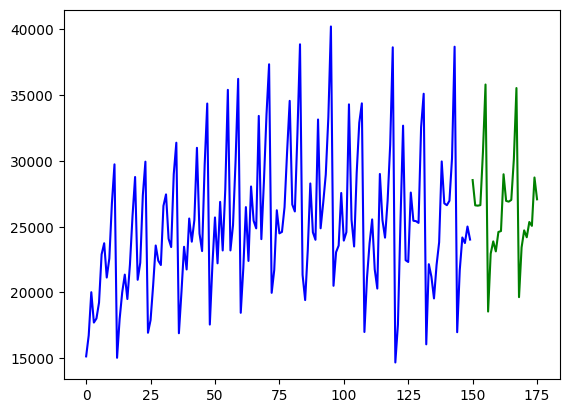

In [2]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# Make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c="blue")
plt.plot(x[150:], forecasts, c="green")
plt.show()


Fitting a more complex pipeline on the sunspots dataset, serializing it, and then loading it from disk to make predictions:

In [3]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

# Load/split your data
y = pm.datasets.load_sunspots()
train, test = train_test_split(y, train_size=2700)

# Define and fit your pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

# Serialize your model just like you would in scikit:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)
    
# Load it and make predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    print(mod.predict(15))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=6.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10383.210, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=10020.218, Time=0.80 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=9831.422, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10381.212, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=9830.357, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=9831.459, Time=0.70 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=9831.930, Time=3.67 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=9817.480, Time=0.22 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=9817.508, Time=1.15 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=9817.413, Time=2.34 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=9817.657, Time=3.29 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=9817.996, Time=4.25 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=9820.047, Time=4.23 sec
 ARIMA(1,1,0)(0,0,1)[

[Link to Pmdarima](https://github.com/alkaline-ml/pmdarima).

### aeon: The Ultimate Library for Time-Series Forecasting and Classification

In [ ]:
!pip install aeon

aeon is a library for time-series data that is compatible with scikit-learn and offers a variety of advanced algorithms for learning tasks like forecasting and classification.

In [4]:
import pandas as pd
from aeon.forecasting.trend import TrendForecaster

y = pd.Series([20.0, 40.0, 60.0, 80.0, 100.0])
forecaster = TrendForecaster()

# fit the forecaster
forecaster.fit(y)  

# forecast the next 3 values
forecaster.predict(fh=[1, 2, 3])  

5    120.0
6    140.0
7    160.0
dtype: float64

In [26]:
import numpy as np
from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier

# 3 samples and 6 time steps 
X =  np.array([[1, 2, 3, 4, 5, 5], [1, 2, 3, 4, 4, 2], [8, 7, 6, 5, 4, 4]])

# class labels for each sample
y = np.array(["low", "low", "high"])

# Define the classifier
clf = KNeighborsTimeSeriesClassifier(distance="dtw")

# fit the classifier on train data
clf.fit(X, y)

# Test data
X_test = np.array([[2, 2, 2, 2, 2, 2], [6, 6, 6, 6, 6, 6]])

# Make class predictions on new data
y_pred = clf.predict(X_test)
y_pred

array(['low', 'high'], dtype='<U4')

[Link to aeon](https://github.com/aeon-toolkit/aeon).

### Ruptures: Detecting Change Points in Non-Stationary Signals

In [ ]:
!pip install ruptures

Use ruptures to detect change points from non-stationary signals such as trend, seasonality, and variance.

With change points, you can detect anomalies or deviations from the expected behavior and gain insights into when these transitions occur.

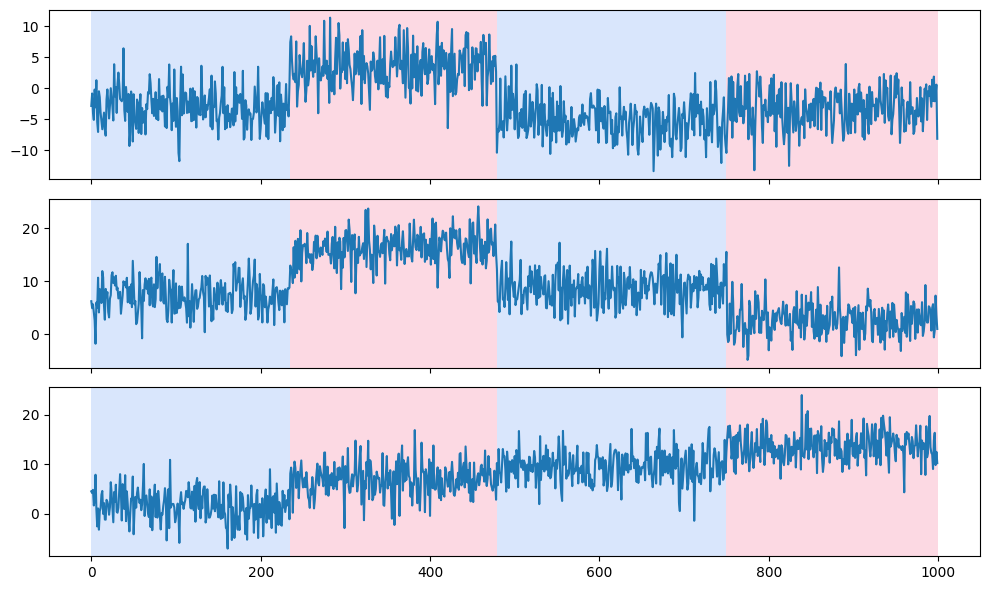

In [13]:
import matplotlib.pyplot as plt
import ruptures as rpt

# generate signal
n_samples, n_features, sigma = 1000, 3, 3
num_breakpoints = 3
signal, true_breakpoints = rpt.pw_constant(
    n_samples, n_features, num_breakpoints, noise_std=sigma
)

# detection
algo = rpt.Pelt(model="rbf").fit(signal)
predicted_breakpoints = algo.predict(pen=10)

# display
rpt.display(signal, predicted_breakpoints)
plt.show()

[Link to ruptures](https://github.com/deepcharles/ruptures).

### GluonTS: Probabilistic Time Series Modeling in Python

Probabilistic models offer a range of possible future outcomes, rather than a single fixed prediction, allowing for the assessment of risk associated with adverse events. 

GluonTS streamlines the process of using probabilistic models for time series data.

```python
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)
dataset = PandasDataset(df, target="#Passengers")

# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

forecasts = list(model.predict(test_data.input))

# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()
```

![](../img/gluonts.png)

[Link to GluonTS](https://github.com/awslabs/gluonts).

### tfcausalimpact: Understand Causal Relationships in Time Series Data

In [ ]:
!pip install tfcausalimpact

You're running a marketing campaign and see a user increase. But how do you know if it's due to the campaign or just a coincidence?

That is when tfcausalimpact comes in handy. It forecasts future data trends using a Bayesian structural model and compares them to actual data to give you meaningful insights.

In [ ]:
import pandas as pd
from causalimpact import CausalImpact


data = pd.read_csv(
    "https://raw.githubusercontent.com/WillianFuks/tfcausalimpact/master/tests/fixtures/arma_data.csv"
)[["y", "X"]]
data.iloc[70:, 0] += 5


ci = CausalImpact(data, pre_period=[0, 69], post_period=[70, 99])
print(ci.summary())
print(ci.summary(output="report"))
ci.plot()

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    125.23             3756.86
Prediction (s.d.)         120.33 (0.3)       3609.94 (9.11)
95% CI                    [119.75, 120.94]   [3592.64, 3628.34]

Absolute effect (s.d.)    4.9 (0.3)          146.93 (9.11)
95% CI                    [4.28, 5.47]       [128.52, 164.23]

Relative effect (s.d.)    4.07% (0.25%)      4.07% (0.25%)
95% CI                    [3.56%, 4.55%]     [3.56%, 4.55%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: `print(impact.summary('report'))`

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 125.23. By contrast, in the absence of an
intervention, we would have expected an average response of 120.33.
The 95% interval of this counterfactual prediction is [119.75, 120.94].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4.9 with a 95% interval of
[4.28, 5.47]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3756.86.
By contrast, had the intervention not taken place, we would have expected
a sum of 3609.94. The 95% interval of this prediction is [3592.64, 3628.34].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an increase of +4.07%. The 95%
interval of this percentage is [3.56%, 4.55%].


This means that the positive effect observed during the intervention
period is statistically significant and unlikely to be due to random
fluctuations. It should be noted, however, that the question of whether
this increase also bears substantive significance can only be answered
by comparing the absolute effect (4.9) to the original goal
of the underlying intervention.


The probability of obtaining this effect by chance is very small
(Bayesian one-sided tail-area probability p = 0.0).
This means the causal effect can be considered statistically
significant.

![](../img/causal_impact.png)

[Link to tfcausalimpact](https://bit.ly/3HSmMFA).

### QuantStats: Simplify Stock Performance Analysis in Python

In [ ]:
!pip install quantstats

To visualize and analyze the performance of specific stocks using just a few lines of Python, try QuantStats.

The code below shows how to use QuantStats to visualize stock performance.

[*********************100%%**********************]  1 of 1 completed


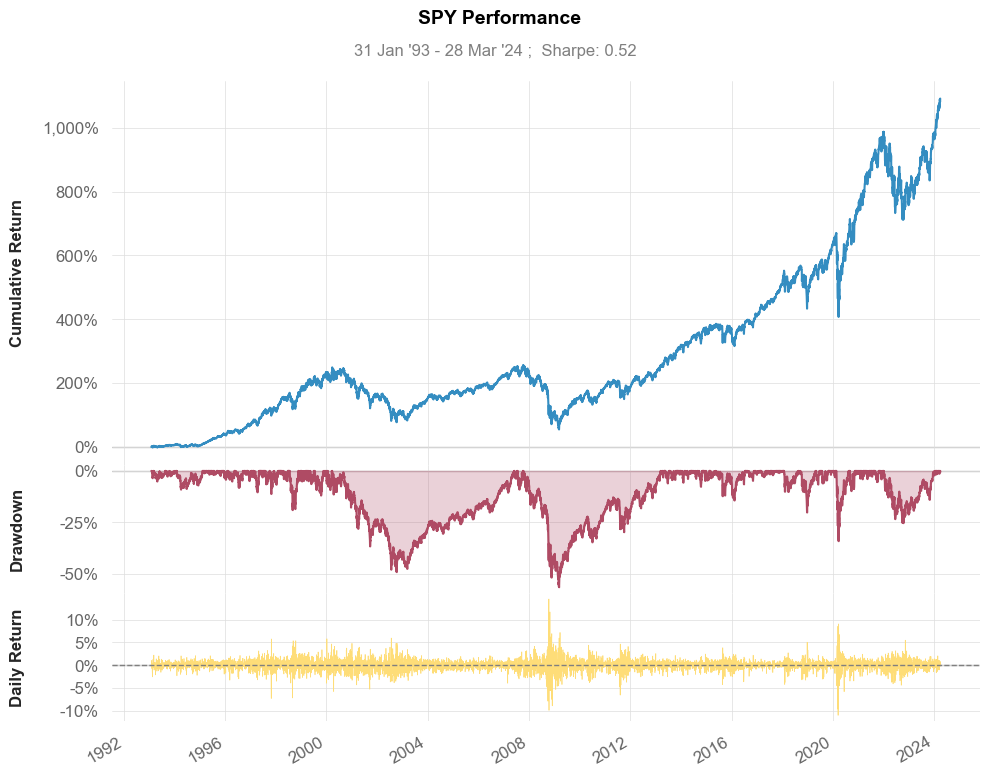

In [4]:
import quantstats as qs

qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('SPY')

# visualize stock performance
qs.plots.snapshot(stock, title='SPY Performance', show=True)

In [ ]:
qs.reports.html(stock, "SPY")


Running the code above will generate a report that looks similar to this:

![](../img/quanstats.png)

[Link to QuantStats](https://bit.ly/4adDSdn).

### kneed: Knee-Point Detection in Time Series

In [ ]:
!pip install "kneed[plot]"

Knee-point detection in time series identifies the point of maximum curvature. The knee point can identify anomalies or outliers in the time series. If a data point is far away from the knee point, it may indicate an anomaly or unexpected behavior.

The kneed library makes it easy to implement knee-point detection in Python.

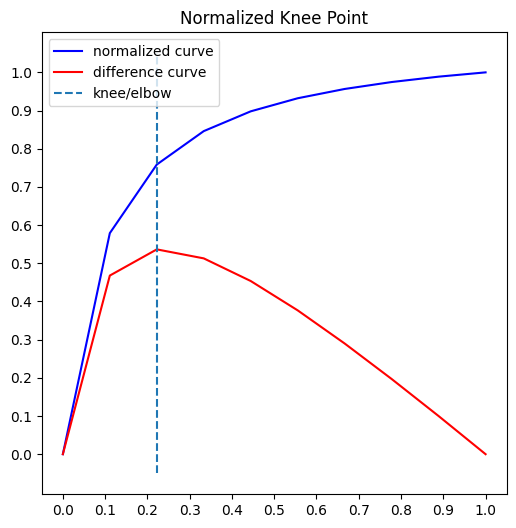

In [6]:
from kneed import DataGenerator, KneeLocator

x, y = DataGenerator.figure2()

kneedle = KneeLocator(x, y, S=1.0, curve="concave", direction="increasing")
kneedle.plot_knee_normalized()

[Link to kneed](https://bit.ly/49tFa2J).

### NeuralForecast: Streamline Neural Forecasting with Familiar Sklearn Syntax

In [ ]:
pip install neuralforecast

Neural forecasting methods can enhance the accuracy of forecasting, but they are often difficult to use and computationally expensive.

NeuralForecast provides a simple way to use proven accurate and efficient models, using familiar sklearn syntax. The models available in NeuralForecast range from classic networks like RNN to the latest transformers.

In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS
from neuralforecast.utils import AirPassengersDF

nf = NeuralForecast(models=[NBEATS(input_size=24, h=12, max_steps=100)], freq="M")

nf.fit(df=AirPassengersDF)
nf.predict()

[Link to NeuralForecast](https://bit.ly/44h9KM7).

### Scaling Time-Series Forecasting with StatsForecast and Spark

In [ ]:
!pip install statsforecast pyspark


Traditional time series libraries are typically built to run in-memory on single machines, which poses challenges when handling extremely large datasets.

StatsForecast, however, provides seamless compatibility with Spark, allowing users to perform scalable and efficient time-series forecasting on large datasets directly within Spark.

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.config(
    "spark.executorEnv.NIXTLA_ID_AS_COL", "1"
).getOrCreate()

In [2]:
from statsforecast.core import StatsForecast
from statsforecast.models import AutoETS
from statsforecast.utils import generate_series
from tqdm.autonotebook import tqdm

n_series = 4
horizon = 7

series = generate_series(n_series)

# Convert to Spark
spark_df = spark.createDataFrame(series)
spark_df.show(5)

/Users/khuyentran/.pyenv/versions/3.8.16/lib/python3.8/site-packages/statsforecast/core.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


+---------+-------------------+-------------------+
|unique_id|                 ds|                  y|
+---------+-------------------+-------------------+
|        0|2000-01-01 00:00:00|0.30138168803582194|
|        0|2000-01-02 00:00:00| 1.2724415914984484|
|        0|2000-01-03 00:00:00|  2.211827399669452|
|        0|2000-01-04 00:00:00|  3.322947056533328|
|        0|2000-01-05 00:00:00|  4.218793605631347|
+---------+-------------------+-------------------+
only showing top 5 rows



In [ ]:
sf = StatsForecast(models=[AutoETS(season_length=7)], freq="D")

# Returns a Spark DataFrame
sf.forecast(df=spark_df, h=horizon, level=[90]).show(5)

[Link to StatsForecast.](https://bit.ly/3KNsl9P)

### Generative Pre-trained Forecasting with TimeGPT

In [ ]:
!pip install nixtla

TimeGPT is a powerful generative pre-trained forecasting model that can generate accurate forecasts for new time series without the need for training. TimeGPT can be used across a variety of tasks including demand forecasting, anomaly detection, financial forecasting, and more.

In [2]:
from nixtla import NixtlaClient

nixtla_client = NixtlaClient(api_key="my_api_key_provided_by_nixtla")

In [3]:
import pandas as pd

time_column = "Month"
value_column = "Sales"
df = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv",
    parse_dates=[time_column],
)

df.head()

,Month,Sales
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


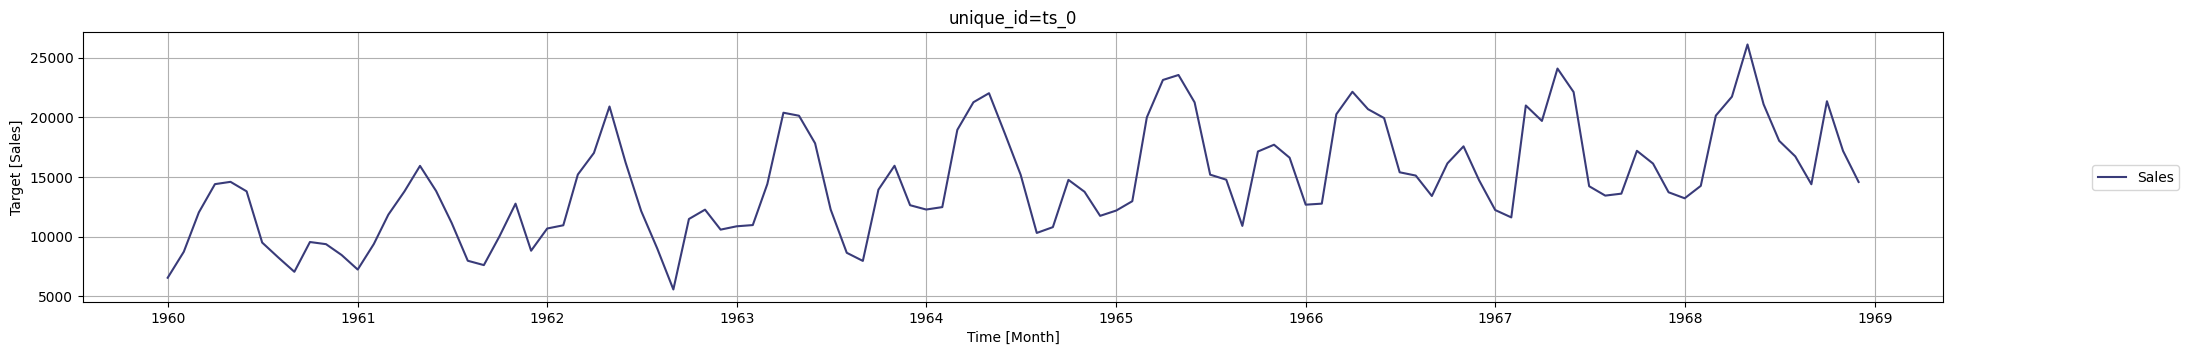

In [4]:
nixtla_client.plot(df, time_col=time_column, target_col=value_column)

In [5]:
timegpt_fcst_df = nixtla_client.forecast(
    df=df, h=12, freq="MS", time_col=time_column, target_col=value_column
)
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,Month,TimeGPT
0,1969-01-01,14672.101562
1,1969-02-01,15793.253906
2,1969-03-01,21517.191406
3,1969-04-01,22996.332031
4,1969-05-01,25959.019531


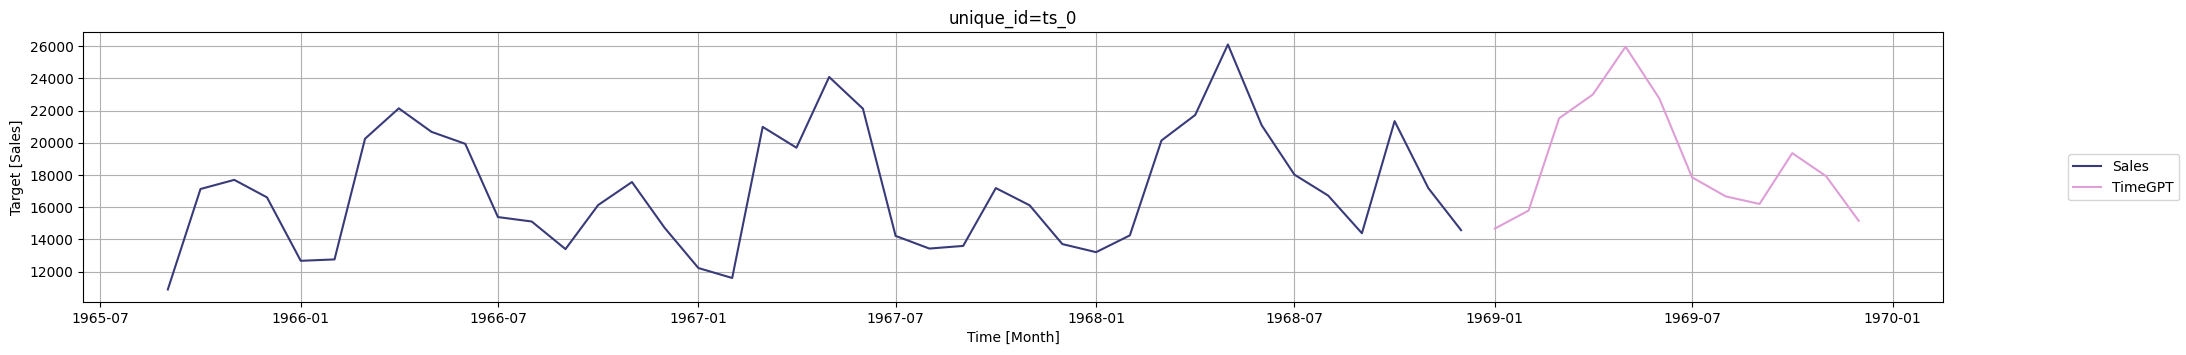

In [6]:
nixtla_client.plot(df, timegpt_fcst_df, time_col=time_column, target_col=value_column, max_insample_length=40)


[Link to TimeGPT](https://github.com/Nixtla/nixtla).

### Automate Time Series Feature Engineering with tsfresh

In [ ]:
!pip install tsfresh

Data scientists spend much of their time cleaning data or building features. While the former is unavoidable, the latter can be automated. 

tsfresh uses a robust feature selection algorithm to automatically extract relevant time series features, freeing up data scientists' time.

To demonstrate this, start with loading an example dataset:

In [2]:
from tsfresh.examples.robot_execution_failures import (
    download_robot_execution_failures,
    load_robot_execution_failures,
)

download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [12]:
timeseries.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


Extract features and select only relevant features for each time series.

In [5]:
from tsfresh import extract_relevant_features

# extract relevant features
features_filtered = extract_relevant_features(
    timeseries, y, column_id="id", column_sort="time"
)

Feature Extraction: 100%|██████████| 20/20 [00:05<00:00,  3.83it/s]


You can now use the features in `features_filtered` to train your classification model. 

In [9]:
# perform model training with the extracted features

[Link to tsfresh](https://bit.ly/3VXi3Ks).